# Pydantic Crash Course | Data Validation in Python | CampusX

https://youtu.be/lRArylZCeOs

### In pydantic we can do both type validation and data validation 

### (eg : data falls in a range or not, age cannot be negative etc)

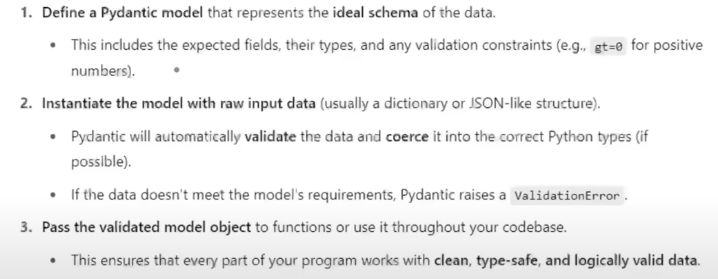



## 🧠 What is Pydantic Validation?

Pydantic is a data validation and settings management library in Python.
It validates **types** (e.g., `int`, `str`, `List[str]`) and **values** (e.g., range, length, regex patterns, etc.) automatically when you create a Pydantic model.

Example:

```python
from pydantic import BaseModel

class User(BaseModel):
    id: int
    name: str
    age: int
```

If you try:

```python
User(id="abc", name="John", age="25")
```

👉 Pydantic will **convert** `"25"` to an integer (if possible)
👉 But it will **raise a validation error** for `"abc"` because it’s not an integer.

---

## ⚙️ 1. **Type Validation**

Pydantic enforces the type hints you provide in your model.

Example:

```python
from pydantic import BaseModel
from typing import List

class Product(BaseModel):
    name: str
    price: float
    tags: List[str]

# ✅ valid
p = Product(name="iPhone", price=999.99, tags=["electronics", "phone"])

# ❌ invalid type
Product(name="iPhone", price="cheap", tags=[123])
```

🔍 Output:

```
pydantic.error_wrappers.ValidationError: 
price
  value is not a valid float (type=type_error.float)
tags -> 0
  str type expected (type=type_error.str)
```

So — **Type Validation** ensures the input matches the declared Python types.

---

## ⚖️ 2. **Value Validation**

Pydantic can also validate **value constraints** beyond just type —
like string length, numerical range, regex match, etc.

Example:

```python
from pydantic import BaseModel, Field, constr, conint

class Employee(BaseModel):
    name: constr(min_length=3, max_length=50)
    age: conint(ge=18, le=60)
    email: str = Field(..., regex=r'^\S+@\S+\.\S+$')

# ✅ valid
Employee(name="Alice", age=30, email="alice@example.com")

# ❌ invalid
Employee(name="Al", age=16, email="invalid_email")
```

🔍 Output:

```
3 validation errors for Employee
name
  ensure this value has at least 3 characters (type=value_error.any_str.min_length)
age
  ensure this value is greater than or equal to 18 (type=value_error.number.not_ge)
email
  string does not match regex (type=value_error.str.regex)
```

---

## 🧩 3. **Custom Validators**

You can add your own logic using the `@validator` decorator.

Example:

```python
from pydantic import BaseModel, validator

class Account(BaseModel):
    username: str
    password: str

    @validator("password")
    def password_strength(cls, v):
        if len(v) < 8:
            raise ValueError("Password too short")
        if not any(char.isdigit() for char in v):
            raise ValueError("Password must contain a number")
        return v

# ❌ Invalid password
Account(username="john", password="weak")

# ✅ Valid
Account(username="john", password="Strong123")
```

---

## 🔐 Summary Table

| Validation Type       | Example                              | Description                  |
| --------------------- | ------------------------------------ | ---------------------------- |
| **Type Validation**   | `price: float`                       | Ensures correct data type    |
| **Value Validation**  | `age: conint(ge=18, le=60)`          | Checks specific value ranges |
| **Regex Validation**  | `email: str = Field(..., regex=...)` | Enforces string patterns     |
| **Custom Validation** | `@validator`                         | Implements custom rules      |

---

## 🧠 Why It’s Important in RAG Systems

In a **RAG pipeline**, Pydantic ensures:

* Proper schema for user inputs (`query`, `context`, `retrieval_limit`, etc.)
* Safe serialization/deserialization of API requests and responses
* Prevents invalid or missing data from crashing your LLM pipeline




## Field Validation

 **robust RAG pipelines or FastAPI apps**, because `Field()` is the **heart of fine-grained validation and metadata control** in Pydantic.

### 🧠 What is `Field` in Pydantic?

In Pydantic, you define model attributes as class variables with type hints.
`Field()` is used to **add extra validation rules**, **default values**, and **metadata** to those attributes.

Think of it as:

> 🔸 "Type hints define what kind of data we expect."

> 🔸 "`Field()` defines how that data should behave or be restricted."

---

### ✅ Example: Basic Usage

```python
from pydantic import BaseModel, Field

class Product(BaseModel):
    name: str = Field(..., min_length=3, max_length=100, description="Name of the product")
    price: float = Field(..., gt=0, description="Price must be greater than zero")
    quantity: int = Field(default=1, ge=1, le=100, description="Stock quantity")

product = Product(name="Laptop", price=999.99)
print(product)
```

* `...` → means the field is **required**
* `min_length`, `max_length` → validate string length
* `gt`, `ge`, `lt`, `le` → numerical comparisons
* `description` → adds metadata (used in FastAPI docs, JSON schema)

---

### ⚙️ Why Do We Need `Field`?

Without `Field()`, Pydantic only checks **data types**.
With `Field()`, you can add:

* Constraints (value range, string length, regex)
* Default values
* Required/optional control
* Metadata for documentation
* Examples for OpenAPI (if using FastAPI)

It’s how you move from just “type-safe” ➜ to **semantically valid and self-documenting** APIs.

---

### 🧩 Common Validation Parameters in `Field()`

| Parameter                   | Meaning                          | Example                                  |
| --------------------------- | -------------------------------- | ---------------------------------------- |
| `default`                   | Default value                    | `Field(default=0)`                       |
| `default_factory`           | Dynamically compute default      | `Field(default_factory=datetime.utcnow)` |
| `gt` / `ge`                 | Greater than / Greater or equal  | `Field(gt=0)`                            |
| `lt` / `le`                 | Less than / Less or equal        | `Field(le=100)`                          |
| `min_length` / `max_length` | String length                    | `Field(min_length=3)`                    |
| `regex`                     | Regular expression match         | `Field(regex=r'^\w+@\w+\.\w+$')`         |
| `description`               | Metadata for docs                | `Field(..., description="User email")`   |
| `example`                   | Example value (for FastAPI docs) | `Field(..., example="john@example.com")` |
| `title`                     | Title in JSON schema             | `Field(..., title="Product Name")`       |
| `alias`                     | Alternative field name in JSON   | `Field(..., alias="product_name")`       |
| `exclude`                   | Exclude from serialization       | `Field(..., exclude=True)`               |

---

## 💡 Example: Field Validation in Context

```python
from pydantic import BaseModel, Field
from datetime import datetime

class User(BaseModel):
    id: int = Field(..., gt=0)
    username: str = Field(..., min_length=3, max_length=20)
    email: str = Field(..., regex=r'^\S+@\S+\.\S+$')
    created_at: datetime = Field(default_factory=datetime.utcnow)

### ✅ Valid
user = User(id=1, username="mohit", email="mohit@example.com")
print(user)

### ❌ Invalid (id must be > 0)
User(id=0, username="mo", email="invalid")
```

---

### ⚖️ Types of Field Validation

1. **Type-based** → checked automatically (`int`, `str`, etc.)
2. **Constraint-based** → defined using `Field()` parameters (`gt`, `min_length`, etc.)
3. **Pattern-based** → using `regex` for string patterns
4. **Computed defaults** → using `default_factory`
5. **Metadata-based** → docs, examples, descriptions for OpenAPI

---

### 🧠 How It’s Used in a RAG/GenAI System

When building APIs around RAG systems (using FastAPI + Pydantic):

```python
class QueryRequest(BaseModel):
    query: str = Field(..., min_length=5, description="User question for retrieval")
    top_k: int = Field(default=3, ge=1, le=10, description="Number of documents to retrieve")
```

* Prevents empty/invalid queries.
* Limits `top_k` to reasonable values.
* Auto-generates clean OpenAPI docs for your API.

---

### ✅ Summary

| Purpose                      | Without `Field()` | With `Field()`               |
| ---------------------------- | ----------------- | ---------------------------- |
| Type Validation              | ✅                 | ✅                            |
| Value Range / Length / Regex | ❌                 | ✅                            |
| Default Handling             | Basic             | Flexible (`default_factory`) |
| OpenAPI Documentation        | ❌                 | ✅                            |
| API Safety                   | Moderate          | Strong                       |

---

Would you like me to show a **real FastAPI RAG example** using `Field()` for query input validation and model response schema?


## 🧩 What is `@field_validator`?

`@field_validator` is a **decorator** in Pydantic used to run **custom validation logic** on specific model fields.

It lets you go **beyond simple Field constraints** (like `gt`, `regex`) and implement **custom rules**, checks, or transformations.

---

### ✅ Example

```python
from pydantic import BaseModel, Field, field_validator

class User(BaseModel):
    name: str = Field(..., min_length=3)
    age: int = Field(..., gt=0)

    @field_validator("name")
    def name_cannot_contain_numbers(cls, value):
        if any(char.isdigit() for char in value):
            raise ValueError("Name cannot contain numbers")
        return value
```

Here:

* `@field_validator("name")` validates the field `name`.
* It’s applied **after** normal type + field validation.
* If validation fails → it raises a `ValueError`.

---

## ⚙️ Why Do We Use `@field_validator`?

Use it when:

* Built-in `Field()` validations are **not enough**.
* You need **conditional logic** or **cross-field consistency**.
* You need to **transform** a field before saving (e.g., strip spaces, lowercase).

---

## 🔁 `mode='before'` vs `mode='after'`

Pydantic v2 added the `mode` argument to `@field_validator`.

| Mode                  | When it Runs                                       | Typical Use                       |
| --------------------- | -------------------------------------------------- | --------------------------------- |
| `"before"`            | Runs **before** type coercion and field validation | Cleaning / Preprocessing raw data |
| `"after"` *(default)* | Runs **after** type coercion and validation        | Business logic validation         |

---

### 🧠 Example: Difference Between `before` and `after`

```python
from pydantic import BaseModel, field_validator

class Product(BaseModel):
    price: float

    # BEFORE validation: preprocess input
    @field_validator("price", mode="before")
    def remove_currency_symbol(cls, value):
        if isinstance(value, str) and value.startswith("$"):
            value = value.replace("$", "")
        return value

    # AFTER validation: enforce business rule
    @field_validator("price", mode="after")
    def validate_price_positive(cls, value):
        if value <= 0:
            raise ValueError("Price must be positive")
        return value


p1 = Product(price="$100")   # ✅ "$" is removed, becomes float 100.0
p2 = Product(price=-5)       # ❌ Raises ValueError
```

**Explanation:**

* The `before` validator runs first → cleans `$100` → becomes `"100"`.
* Then type coercion → converts `"100"` → `float(100.0)`.
* The `after` validator runs → checks positivity → OK ✅

---

### 🧩 You Can Validate Multiple Fields Together

You can list multiple fields in one validator.

```python
class Coordinates(BaseModel):
    x: float
    y: float

    @field_validator("x", "y")
    def check_coordinates(cls, value):
        if abs(value) > 1000:
            raise ValueError("Coordinate value too large")
        return value
```

---

### 🧠 Key Differences from `@model_validator`

| Feature  | `@field_validator`               | `@model_validator`     |
| -------- | -------------------------------- | ---------------------- |
| Scope    | Single or multiple fields        | Whole model            |
| Runs     | Per field                        | Once per model         |
| Use case | Validate or preprocess one field | Cross-field validation |

---

### 🔒 Real-World Example in a GenAI / RAG Project

Imagine a **FastAPI endpoint** for document upload:

```python
from pydantic import BaseModel, Field, field_validator

class DocumentInput(BaseModel):
    file_path: str = Field(..., description="Path to file in S3 bucket")
    chunk_size: int = Field(default=500, ge=100, le=2000)

    @field_validator("file_path", mode="after")
    def validate_s3_path(cls, value):
        if not value.startswith("s3://"):
            raise ValueError("file_path must be an S3 path (e.g., s3://bucket/file.pdf)")
        return value
```

* Ensures valid **S3 URI** format.
* Prevents invalid inputs before embedding or vectorization.

---

### ✅ Summary

| Concept            | Meaning                                                |
| ------------------ | ------------------------------------------------------ |
| `@field_validator` | Custom validation for a single or multiple fields      |
| `mode='before'`    | Runs **before** type coercion (use for cleaning data)  |
| `mode='after'`     | Runs **after** type coercion (use for enforcing logic) |
| Best for           | Extra rules, sanitizing inputs, transformations        |



## Model_validator


## 🧩 What is `@model_validator` in Pydantic?

`@model_validator` is a **decorator** used to perform **validation or transformation on the entire model** — meaning it can see and modify **multiple fields together**.

It’s used when:

* Validation depends on **relationships between fields**.
* You need to perform **post-processing logic** on the model as a whole.
* You want to ensure **cross-field consistency**.

---

### ✅ Example

```python
from pydantic import BaseModel, model_validator

class Booking(BaseModel):
    start_date: str
    end_date: str

    @model_validator(mode="after")
    def check_dates(cls, values):
        if values.start_date > values.end_date:
            raise ValueError("start_date cannot be after end_date")
        return values
```

🟢 This checks **both fields together** — something `@field_validator` cannot do.

---
### ⚙️ When to Use `@model_validator`

Use it when:

* Validation involves **multiple fields**.
* You need to **enforce logical conditions** (like `min < max`).
* You want to perform **custom initialization or derived field computation**.

---

### 🔁 `mode='before'` vs `mode='after'`

Just like `@field_validator`, the **`mode`** controls *when* it runs.

| Mode       | When it Runs                                | Common Use                                |
| ---------- | ------------------------------------------- | ----------------------------------------- |
| `"before"` | Before Pydantic validates individual fields | Clean raw input or inject default values  |
| `"after"`  | After all field validation                  | Cross-field consistency or computed logic |

---

### 🧠 Example: Difference Between `before` and `after`

```python
from pydantic import BaseModel, model_validator

class User(BaseModel):
    full_name: str
    first_name: str = ""
    last_name: str = ""

    @model_validator(mode="before")
    def split_full_name(cls, values):
        # before: raw dict input available
        if "full_name" in values and not values.get("first_name"):
            parts = values["full_name"].split(" ", 1)
            values["first_name"] = parts[0]
            values["last_name"] = parts[1] if len(parts) > 1 else ""
        return values

    @model_validator(mode="after")
    def validate_names(cls, model):
        # after: model instance available
        if not model.first_name or not model.last_name:
            raise ValueError("Both first and last names are required")
        return model


user = User(full_name="Mohit Kumar")
print(user)
```

**Output:**

```
first_name='Mohit' last_name='Kumar' full_name='Mohit Kumar'
```

✅ The `"before"` validator split the full name before type validation.
✅ The `"after"` validator ensured both names exist.

---

### 🧩 Comparison: `@field_validator` vs `@model_validator`

| Feature       | `@field_validator`              | `@model_validator`                    |
| ------------- | ------------------------------- | ------------------------------------- |
| Scope         | One or multiple specific fields | Whole model                           |
| Input         | Single field value(s)           | Full dict or model instance           |
| Use Case      | Validate / transform one field  | Cross-field checks or global logic    |
| Example       | Validate that `age > 0`         | Validate that `start_date < end_date` |
| mode="before" | Clean individual input          | Clean whole input dict                |
| mode="after"  | Validate individual field       | Validate relationships                |

---

### ⚙️ Real-World Example in a RAG (Retrieval-Augmented Generation) Project

Let’s say you have a request model for a document comparison API:

```python
from pydantic import BaseModel, Field, model_validator

class CompareRequest(BaseModel):
    doc1_id: str = Field(..., description="S3 path of first document")
    doc2_id: str = Field(..., description="S3 path of second document")
    metric: str = Field(default="cosine", description="Similarity metric")

    @model_validator(mode="after")
    def validate_documents(cls, model):
        if model.doc1_id == model.doc2_id:
            raise ValueError("Documents must be different for comparison")
        if model.metric not in ["cosine", "euclidean"]:
            raise ValueError("Invalid metric type")
        return model
```

This ensures:

* Both document IDs are different.
* The similarity metric is valid.
* This logic involves **multiple fields**, so `@model_validator` is the right choice.

---

### ✅ Summary

| Concept            | Description                                           |
| ------------------ | ----------------------------------------------------- |
| `@model_validator` | Validates or transforms **the entire model**          |
| `mode="before"`    | Preprocesses the **raw input dict** before validation |
| `mode="after"`     | Validates **final model instance** after field checks |
| Best for           | Cross-field consistency and logical conditions        |
| Common in          | Business rules, RAG requests, config validation       |



## @computed_field

Used for: Creating derived fields — fields computed from other fields __but not passed in input__.


### (Think of it like a “virtual column”)

```python
from pydantic import BaseModel, computed_field

class User(BaseModel):
    first_name: str
    last_name: str

    @computed_field
    @property
    def full_name(self) -> str:
        return f"{self.first_name} {self.last_name}"

user = User(first_name="Mohit", last_name="Kumar")
print(user.full_name)  # ➜ Mohit Kumar
```

✅ Adds computed attributes that appear in `dict()` or API response but aren’t part of input.

## nested_model



### 🧩 What is a Nested Model in Pydantic?

A **nested model** means you have one `BaseModel` **inside another**.
It’s used when your data has **hierarchical or structured fields** (like a dictionary or JSON object inside another object).

> 💡 In simple terms:
> You use a “model within a model” to keep your data clean, modular, and validated at every level.

---

### ✅ Example 1 — Simple Nested Model

```python
from pydantic import BaseModel

class Address(BaseModel):
    street: str
    city: str
    zip_code: str

class User(BaseModel):
    name: str
    age: int
    address: Address  # Nested model

user_data = {
    "name": "Mohit Kumar",
    "age": 28,
    "address": {
        "street": "123 MG Road",
        "city": "Bangalore",
        "zip_code": "560001"
    }
}

user = User(**user_data)
print(user)
```

✅ Output:

```
name='Mohit Kumar' age=28 address=Address(street='123 MG Road', city='Bangalore', zip_code='560001')
```

Here:

* `User` contains another model `Address` as a field.
* When Pydantic validates `User`, it also **recursively validates** `Address`.

---

### 🧠 Why Do We Use Nested Models?

| Reason                       | Benefit                                                                             |
| ---------------------------- | ----------------------------------------------------------------------------------- |
| **Reusability**              | Define once, use in multiple schemas (e.g., `Address` in both `User` and `Company`) |
| **Clarity**                  | Keeps models clean and modular instead of one huge flat schema                      |
| **Validation at all levels** | Every nested model gets its own validation                                          |
| **Better OpenAPI docs**      | FastAPI automatically shows nested structure in API docs                            |

---

### 🧩 Example 2 — Nested Models with Lists

```python
from typing import List
from pydantic import BaseModel

class Document(BaseModel):
    name: str
    url: str

class Project(BaseModel):
    title: str
    documents: List[Document]  # list of nested models

project_data = {
    "title": "RAG Document Portal",
    "documents": [
        {"name": "10K Report", "url": "s3://bucket/10k.pdf"},
        {"name": "MD&A", "url": "s3://bucket/mda.pdf"}
    ]
}

project = Project(**project_data)
print(project.documents[0].name)
```

✅ Output:

```
10K Report
```

✅ Each document is validated against the `Document` model schema.

---

### ⚙️ Example 3 — Nested Models in RAG/FastAPI Context

In your **Document Portal project**, you could define schemas like this:

```python
from typing import List
from pydantic import BaseModel, Field

class Chunk(BaseModel):
    text: str
    embedding: List[float]

class DocumentMetadata(BaseModel):
    title: str
    source: str
    page_count: int

class Document(BaseModel):
    metadata: DocumentMetadata
    chunks: List[Chunk]

class QueryRequest(BaseModel):
    query: str = Field(..., description="User query for retrieval")
    documents: List[Document]
```

✅ Pydantic automatically validates:

* That each `Document` contains valid metadata.
* Each chunk has a list of floats in `embedding`.

---

### 🧩 Example 4 — Nested Models with Default Values

```python
class Config(BaseModel):
    model_name: str = "gpt-4"
    temperature: float = 0.7

class Query(BaseModel):
    text: str
    config: Config = Config()  # nested default model
```

✅ Even if user doesn’t pass config, it defaults to `Config()`.

---

### 🧠 Accessing Nested Data

```python
query = Query(text="Summarize this document")
print(query.config.model_name)  # gpt-4
```

You access nested attributes like normal Python objects.

---

### ✅ Summary

| Concept             | Description                                      | Example                     |
| ------------------- | ------------------------------------------------ | --------------------------- |
| **Nested Model**    | A Pydantic model used as a field inside another  | `address: Address`          |
| **Validation**      | Each nested model validates its own fields       | Automatic                   |
| **Reusability**     | One nested schema used in multiple parent models | Clean structure             |
| **Lists of models** | Supported via `List[Model]`                      | `documents: List[Document]` |

---

### 🧱 In Real Projects (like RAG / GenAI)

You’ll use nested models for:

* **User sessions** → `User → Session → QueryHistory`


* **Document ingestion** → `Document → Metadata → Chunks`


* **Configuration schemas** → `Pipeline → Model → Embeddings → Retriever`


## Serialization



## 🧩 What is **Serialization** in Pydantic?

> **Serialization** means converting a **Python object → JSON-compatible format** (like `dict`, `str`, or `JSON`).

In short:

* **Serialization = Python → JSON**
* **Deserialization = JSON → Python**

---

### 🧠 Why is Serialization Needed?

You use serialization when:

1. Sending model data as **API response** (FastAPI returns JSON).
2. Saving data to **databases or files** (JSON, MongoDB, etc.).
3. Logging, caching, or tracking structured objects.
4. Sending data between services (microservices, queues, etc.).

---

### 🧱 Example — Basic Serialization

```python
from pydantic import BaseModel

class User(BaseModel):
    name: str
    age: int

user = User(name="Mohit", age=28)

# Serialize to dict
print(user.model_dump())  # ✅ modern method (Pydantic v2)
# {'name': 'Mohit', 'age': 28}

# Serialize to JSON
print(user.model_dump_json())
# '{"name":"Mohit","age":28}'
```

🧠 **`model_dump()`**
→ Converts Pydantic object into a standard Python dictionary.

🧠 **`model_dump_json()`**
→ Converts the model into a JSON string (used in APIs or network calls).

---

### 🧩 Why Not Just Use `__dict__`?

While you *can* do `user.__dict__`, it **does not apply validation or field aliasing**.
Pydantic’s methods ensure:

* Field aliases are respected.
* Excluded/hidden fields are ignored.
* Data types (like datetime, UUID) are converted properly.

---

### 🧱 Example — With Aliases and Exclusions

```python
from pydantic import BaseModel, Field

class Employee(BaseModel):
    full_name: str = Field(..., alias="name")
    salary: float
    password: str

emp = Employee(name="John Doe", salary=50000, password="secret123")

# Serialize but hide password
print(emp.model_dump(exclude={"password"}))
# {'full_name': 'John Doe', 'salary': 50000.0}

# Serialize using alias
print(emp.model_dump(by_alias=True))
# {'name': 'John Doe', 'salary': 50000.0, 'password': 'secret123'}
```

✅ This makes it **safe for API responses** — you can exclude sensitive fields like passwords or tokens.

---

### 🧩 Example — Serialization with Complex Types

```python
from datetime import datetime
from pydantic import BaseModel

class LogEntry(BaseModel):
    message: str
    timestamp: datetime

log = LogEntry(message="Document uploaded", timestamp=datetime.now())

print(log.model_dump_json())
```

✅ Output:

```json
{"message": "Document uploaded", "timestamp": "2025-10-09T19:05:32.123456"}
```

Pydantic automatically converts `datetime` to ISO format JSON string.

---

### 🧠 Serialization Options in `model_dump()`

| Parameter          | Description                 | Example                   |
| ------------------ | --------------------------- | ------------------------- |
| `exclude`          | Fields to exclude           | `exclude={"password"}`    |
| `include`          | Only include certain fields | `include={"name", "age"}` |
| `by_alias`         | Use alias names             | `by_alias=True`           |
| `exclude_none`     | Skip `None` fields          | `exclude_none=True`       |
| `exclude_defaults` | Skip default values         | `exclude_defaults=True`   |

---

### 🧱 In a RAG/GenAI Context

You’ll use serialization to:

* Return query results or summaries as JSON via FastAPI.
* Store embeddings or documents in vector DBs.
* Log model responses for evaluation or tracking.

Example:

```python
class RAGResponse(BaseModel):
    query: str
    answer: str
    sources: list[str]

rag_response = RAGResponse(
    query="Summarize Item 7",
    answer="Item 7 discusses the company's financial performance...",
    sources=["10K_2023.pdf", "MD&A.pdf"]
)

# API Response
return rag_response.model_dump_json()
```

✅ Ensures consistent, clean, and validated API output.

---

### ✅ Summary

| Concept                        | Description                                       | Example                             |
| ------------------------------ | ------------------------------------------------- | ----------------------------------- |
| **Serialization**              | Converting Python object → JSON/dict              | `model_dump()`, `model_dump_json()` |
| **Why use it**                 | For API responses, saving to DB, or logs          | Ensures clean JSON output           |
| **Exclusions**                 | Hide sensitive fields                             | `exclude={"password"}`              |
| **Automatic conversion**       | Datetime, UUID, enums, etc. handled automatically | No manual parsing needed            |
| **Deserialization (opposite)** | JSON → Python Model                               | `User(**data)`                      |

